<a href="https://colab.research.google.com/github/rtan01/Group1Project1/blob/main/DataApendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
var_list = ['prochoic', 'partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'prolife', 'sex']


output_file = 'gss_data_url.csv'
modes = ['w', 'a']
phase = 0


for k in range(3):
    url = f'https://github.com/DS3001/project_gss/raw/main/gss_chunk_{k+1}.parquet'
    df = pd.read_parquet(url, columns=var_list)
    header = True if phase == 0 else False
    df.to_csv(output_file, mode=modes[phase], header=header, index=False)

    phase = 1
df = pd.read_csv(output_file)
df.to_csv('df.csv', index=False)

In [ ]:
# Summary statistics for numerical variables
print(df.shape[0])
print(df.info())
df.head()



72390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prochoic  3551 non-null   object 
 1   partyid   71905 non-null  object 
 2   year      72390 non-null  int64  
 3   age       71621 non-null  float64
 4   income    63439 non-null  object 
 5   polviews  62718 non-null  object 
 6   relig     71953 non-null  object 
 7   region    72390 non-null  object 
 8   abany     39258 non-null  object 
 9   prolife   3537 non-null   object 
 10  sex       72278 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 6.1+ MB
None


,prochoic,partyid,year,age,income,polviews,relig,region,abany,prolife,sex
0,NaN,"independent, close to democrat",1972,23.0,NaN,NaN,jewish,east north central,NaN,NaN,female
1,NaN,not very strong democrat,1972,70.0,NaN,NaN,catholic,east north central,NaN,NaN,male
2,NaN,"independent (neither, no response)",1972,48.0,NaN,NaN,protestant,east north central,NaN,NaN,female
3,NaN,not very strong democrat,1972,27.0,NaN,NaN,other,east north central,NaN,NaN,female
4,NaN,strong democrat,1972,61.0,NaN,NaN,protestant,east north central,NaN,NaN,female


In [ ]:
variables = ['prochoic', 'partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'prolife', 'sex']

# Print variable types
print("Variable Types:")
print(df[variables].dtypes)

# Analyzing unique response codes for each variable
print("Unique Response Codes:")
for var in variables:
    unique_values = df[var].unique()
    print(f"{var}: {unique_values}")

#Summary of missing values per column
missing_summary = df.isnull().sum()
print("Missing values per column:", missing_summary)


Variable Types:
prochoic     object
partyid      object
year          int64
age         float64
income       object
polviews     object
relig        object
region       object
abany        object
prolife      object
sex          object
dtype: object
Unique Response Codes:
prochoic: ['strongly agree' 'disagree' 'agree' 'neither agree nor disagree'
 'strongly disagree']
partyid: ['independent, close to democrat' 'not very strong republican'
 'strong democrat' 'other party' 'independent (neither, no response)'
 'not very strong democrat' 'independent, close to republican'
 'strong republican']
year: [2021]
age: [61. 23. 20. 33. 43. 44. 30. 52. 62. 24. 57. 31. 82. 42. 63. 41. 66. 79.
 38. 68. 71. 89. 28. 37. 87. 74. 45. 36. 32. 70. 78. 46. 67. 47. 60. 64.
 34. 53. 48. 25. 65. 29. 69. 39. 59. 75. 49. 27. 73. 51. 26. 22. 50. 55.
 72. 40. 56. 80. 35. 76. 84. 81. 85. 77. 58. 54. 21. 83. 19. 86. 88.]
income: ['$8,000 to $9,999' '$25,000 or more' '$20,000 to $24,999'
 '$10,000 to $14,999' '$1,00

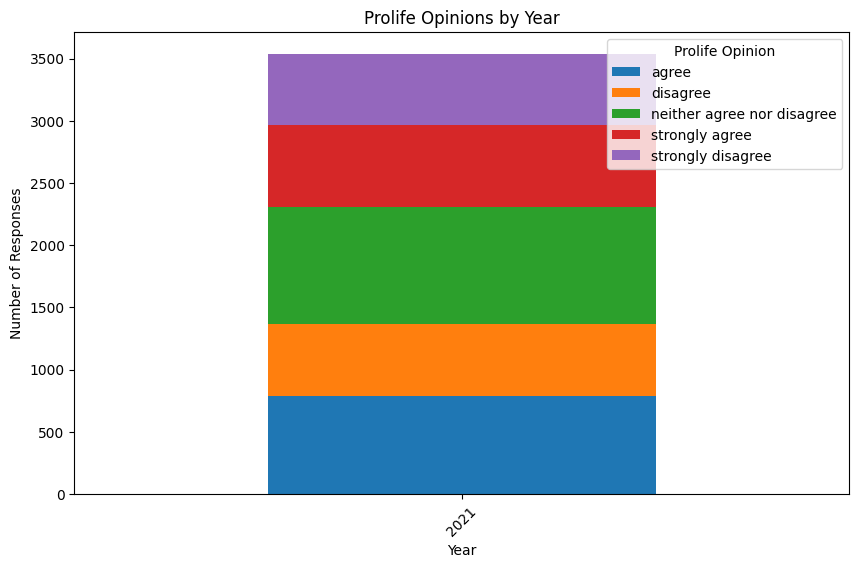

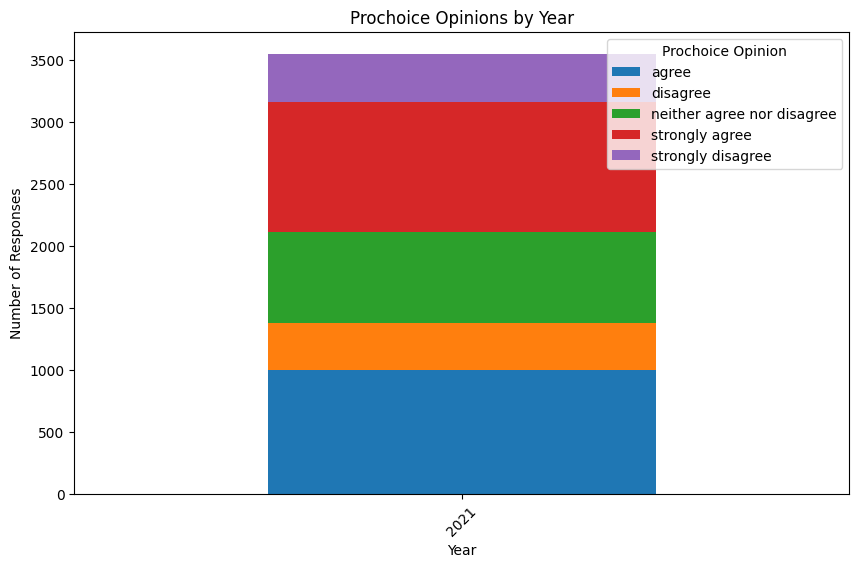

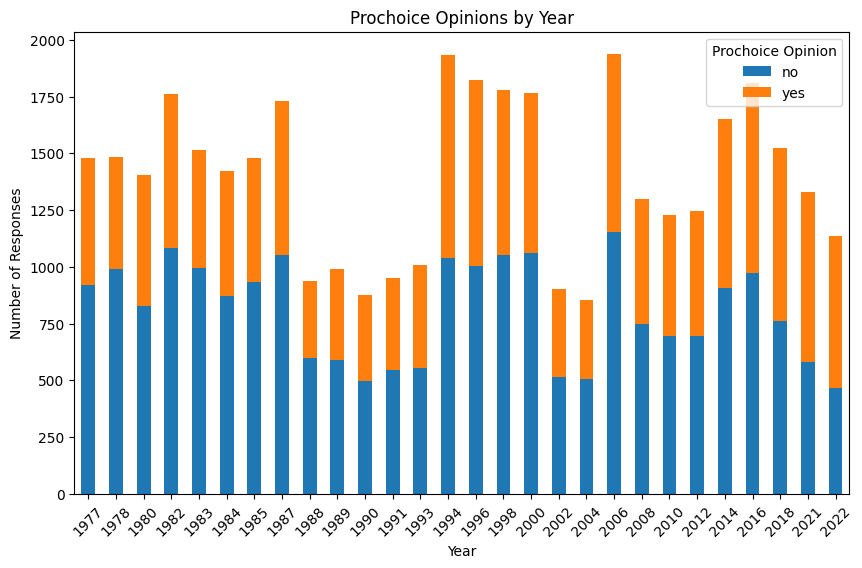

In [ ]:
import matplotlib.pyplot as plt

# Aggregate data and plotting by year
aggregated_prolife = df.groupby(['year', 'prolife']).size().unstack(fill_value=0)
aggregated_prolife.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Prolife Opinions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend(title='Prolife Opinion')
plt.xticks(rotation=45)
plt.show()


aggregated_prochoic = df.groupby(['year', 'prochoic']).size().unstack(fill_value=0)
aggregated_prochoic.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Prochoice Opinions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend(title='Prochoice Opinion')
plt.xticks(rotation=45)
plt.show()

aggregated_abany = df.groupby(['year', 'abany']).size().unstack(fill_value=0)
aggregated_abany.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Opinion on indiuvals right to an abortion by Year')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend(title='Opinion on indiuvals right to an abortion')
plt.xticks(rotation=45)
plt.show()

#Revealed that the prolife prochoic variable was only collected in 2021

In [ ]:
#Clean Data
df = dfog[dfog['year'] == 2021]
df.describe()
df.isna()

,year,age
count,4032.0,3699.000000
mean,2021.0,52.164639
std,0.0,17.233333
min,2021.0,18.000000
25%,2021.0,37.000000
50%,2021.0,53.000000
75%,2021.0,66.000000
max,2021.0,89.000000


In [ ]:
##Clean data##
#Drop data that is not from 2021
df = df[df['year'] == 2021]
# Check if there are any more missing values in the DataFrame
missing_summary = df.isnull().sum()
print("Missing values per column:", missing_summary)
# Drop missing data
df = df.dropna(subset=var_list)
#Save clean data
df.to_csv('cleaned_data.csv', index=False)




Missing values per column: prochoic    0
partyid     0
year        0
age         0
income      0
polviews    0
relig       0
region      0
abany       0
prolife     0
sex         0
dtype: int64


In [ ]:
# Print variable types
print("Variable Types:")
print(df[variables].dtypes)

# Analyzing unique response codes for each variable
print("Unique Response Codes:")
for var in variables:
    unique_values = df[var].unique()
    print(f"{var}: {unique_values}")

Variable Types:
prochoic     object
partyid      object
year          int64
age         float64
income       object
polviews     object
relig        object
region       object
abany        object
prolife      object
sex          object
dtype: object
Unique Response Codes:
prochoic: ['strongly agree' 'disagree' 'agree' 'neither agree nor disagree'
 'strongly disagree']
partyid: ['independent, close to democrat' 'not very strong republican'
 'strong democrat' 'other party' 'independent (neither, no response)'
 'not very strong democrat' 'independent, close to republican'
 'strong republican']
year: [2021]
age: [61. 23. 20. 33. 43. 44. 30. 52. 62. 24. 57. 31. 82. 42. 63. 41. 66. 79.
 38. 68. 71. 89. 28. 37. 87. 74. 45. 36. 32. 70. 78. 46. 67. 47. 60. 64.
 34. 53. 48. 25. 65. 29. 69. 39. 59. 75. 49. 27. 73. 51. 26. 22. 50. 55.
 72. 40. 56. 80. 35. 76. 84. 81. 85. 77. 58. 54. 21. 83. 19. 86. 88.]
income: ['$8,000 to $9,999' '$25,000 or more' '$20,000 to $24,999'
 '$10,000 to $14,999' '$1,00